### Linear Regression

In [1]:
import random
import numpy as np

X_train = [0] * 1000
y_train = [0] * 1000
e_train = [0] * 1000

# 1000 Training Data Generation
for i in range(1000):
    X_train[i] = random.uniform(-1.5, 1.0)
    e_train[i] = random.normalvariate(0.0, 0.5)
    y_train[i] = 3 * pow(X_train[i], 3) + 2 * pow(X_train[i], 2) - 3 * X_train[i] + 1 + e_train[i]

# 500 Test Data Generation
X_test = np.linspace(-1.5, 1.0, 500)

In [2]:
# Data Preprocessing
from sklearn.preprocessing import PolynomialFeatures

X_train_arr = np.array(X_train).reshape(1000, 1)
y_train_arr = np.array(X_train).reshape(1000, 1)
X_test_arr = np.array(X_test).reshape(500, 1)

poly = PolynomialFeatures(degree = 1)
X_train_1 = poly.fit_transform(X_train_arr)
X_test_1 = poly.fit_transform(X_test_arr)

poly = PolynomialFeatures(degree = 2)
X_train_2 = poly.fit_transform(X_train_arr)
X_test_2 = poly.fit_transform(X_test_arr)

poly = PolynomialFeatures(degree = 3)
X_train_3 = poly.fit_transform(X_train_arr)
X_test_3 = poly.fit_transform(X_test_arr)

poly = PolynomialFeatures(degree = 4)
X_train_4 = poly.fit_transform(X_train_arr)
X_test_4 = poly.fit_transform(X_test_arr)

In [3]:
# Linear Regression
# degree-K polynomial features
# K = 1, 2, 3, 4

from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = False).fit(X_train_1, y_train)
coef_1 = reg.coef_
print(coef_1)
y_pred_1 = reg.predict(X_test_1)

reg = LinearRegression(fit_intercept = False).fit(X_train_2, y_train)
coef_2 = reg.coef_
y_pred_2 = reg.predict(X_test_2)

reg = LinearRegression(fit_intercept = False).fit(X_train_3, y_train)
coef_3 = reg.coef_
y_pred_3 = reg.predict(X_test_3)

reg = LinearRegression(fit_intercept = False).fit(X_train_4, y_train)
coef_4 = reg.coef_
y_pred_4 = reg.predict(X_test_4)

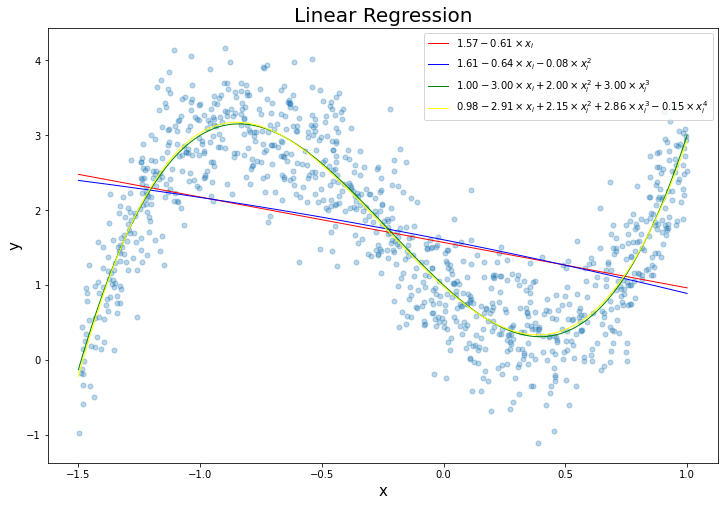

In [4]:
# plot results

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(X_train, y_train, 'o', markersize=5, alpha=0.3)
plt.plot(X_test, y_pred_1 , 'red' , linewidth=1, 
         label=(f"${'%.2f' % coef_1[0]} {'%.2f' % coef_1[1] if coef_1[1] < 0 else '+%.2f' % coef_1[1]} \\times x_i $"))
plt.plot(X_test, y_pred_2, 'blue', linewidth=1, 
         label=(f"${'%.2f' % coef_2[0]} {'%.2f' % coef_2[1] if coef_2[1] < 0 else '+%.2f' % coef_2[1]} \\times x_i {'%.2f' % coef_2[2] if coef_2[2] < 0 else '+%.2f' % coef_2[2]} \\times x_i^{2}$"))
plt.plot(X_test, y_pred_3, 'green', linewidth=1, 
         label=(f"${'%.2f' % coef_3[0]} {'%.2f' % coef_3[1] if coef_3[1] < 0 else '+%.2f' % coef_3[1]} \\times x_i {'%.2f' % coef_3[2] if coef_3[2] < 0 else '+%.2f' % coef_3[2]} \\times x_i^{2} {'%.2f' % coef_3[3] if coef_3[3] < 0 else '+%.2f' % coef_3[3]} \\times x_i^{3}$"))
plt.plot(X_test, y_pred_4, 'yellow', linewidth=1, 
         label=(f"${'%.2f' % coef_4[0]} {'%.2f' % coef_4[1] if coef_4[1] < 0 else '+%.2f' % coef_4[1]} \\times x_i {'%.2f' % coef_4[2] if coef_4[2] < 0 else '+%.2f' % coef_4[2]} \\times x_i^{2} {'%.2f' % coef_4[3] if coef_4[3] < 0 else '+%.2f' % coef_4[3]} \\times x_i^{3} {'%.2f' % coef_4[4] if coef_4[4] < 0 else '+%.2f' % coef_4[4]} \\times x_i^{4}$"))
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Linear Regression', fontsize=20)
plt.legend(loc='upper right')

#plt.savefig('C:/Users/JulieTai/Desktop/Julie/109_1st/Intro. to Machine Learning/Hw/Hw3/Linear Regression.png')
plt.show()

### Logistic Regression

In [5]:
# Data Generation
cov = [[0.1, 0], [0, 0.1]]
X = [0] * 1000
y = [0] * 1000

for i in range(1000):
    y[i] = random.randint(0, 1)
    X[i] = np.random.multivariate_normal([y[i], y[i]], cov)

In [6]:
# fit model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(penalty = 'l2', random_state=0).fit(X, y)
coef = clf.coef_
intercept = clf.intercept_
y_pred = clf.predict(X)
print("Accuracy of Logistic Regression:", metrics.accuracy_score(y, y_pred))
print("yi = L(", intercept[0], str(coef[0][0]) if coef[0][0] < 0 else ' + ' + str(coef[0][0]), ' × ', 'Xi0', str(coef[0][1]) if coef[0][1] < 0 else ' + ' + str(coef[0][1]),' × ', 'Xi1', ')', sep='')

Accuracy of Logistic Regression: 0.989
yi = L(-5.054059336622416 + 5.113413017701373 × Xi0 + 5.214148572327736 × Xi1)


In [7]:
from mlxtend.plotting import plot_decision_regions

X = np.array(X)
y = np.array(y)

# Plotting decision regions
plt.figure(figsize=(8, 8))
ax = plot_decision_regions(X, y, clf=clf, legend=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f"$y_i = 0$", f"$y_i = 1$"], framealpha=0.3, scatterpoints=1)

# Adding axes annotations
plt.xlabel(f"$x_i$""$_0$", fontsize=15)
plt.ylabel(f"$x_i$""$_1$", fontsize=15)
plt.title('Logistic Regression', fontsize=20)

#plt.savefig('C:/Users/JulieTai/Desktop/Julie/109_1st/Intro. to Machine Learning/Hw/Hw3/Logistic Regression.png')
plt.show()

ModuleNotFoundError: No module named 'mlxtend'